In [2]:
%matplotlib inline 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.applications import resnet50

from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization, MaxPooling2D, GlobalAvgPool2D, \
    Flatten, Add, Concatenate, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback

In [4]:
model = resnet50.ResNet50()

In [5]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [6]:
jpeg_file = tf.io.read_file("./data/natural_images/cat/cat_0062.jpg")
cat_image = tf.image.decode_jpeg(jpeg_file)
cat_image_resized = tf.cast(tf.image.resize(cat_image,(224,224,)),tf.int64)

In [7]:
cat_image_preprocessed = resnet50.preprocess_input(cat_image_resized)

In [8]:
cat_image_batch = tf.expand_dims(cat_image_preprocessed,0)

In [9]:
resnet50.decode_predictions(model.predict(cat_image_batch),top=3)

1/1 [==============================] - 2s 2s/step


[[('n02124075', 'Egyptian_cat', 0.3524355),
  ('n02123597', 'Siamese_cat', 0.28925267),
  ('n02127052', 'lynx', 0.12249002)]]

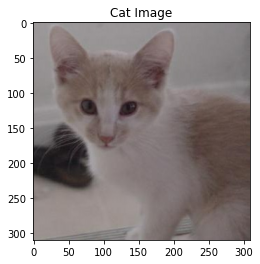

In [10]:
plt.imshow(cat_image)
plt.title("Cat Image")
plt.show()

In [19]:
model.layers[:]

In [21]:
conv_head = Model(inputs = model.input, outputs = model.layers[-2].output)

In [22]:
conv_head.input.shape, conv_head.output_shape

(TensorShape([None, 224, 224, 3]), (None, 2048))

In [36]:
# dense_layer_intermediate = Dense(256, activation= "relu")(conv_head.output)
# dropout_intermediate = Dropout(0.1)(dense_layer_intermediate)
# dense_layer_output = Dense(8, activation="softmax")(dropout_intermediate)
# dense_layer_output

In [37]:
transfer_model = Sequential([
    conv_head,
    Dense(256,activation="relu"),
    Dropout(0.1),
    Dense(8, activation="softmax")
])

In [38]:
transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 24,114,312
Trainable params: 24,061,192
Non-trainable params: 53,120
_________________________________________________________________


In [44]:
for i, layer in enumerate(conv_head.layers): # its called FREEZING - when we freeze the first part 
    print(i,layer)

0 <keras.engine.input_layer.InputLayer object at 0x00000256F54ADC10>
1 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x00000256AD179070>
2 <keras.layers.convolutional.conv2d.Conv2D object at 0x00000256AD1795E0>
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000256AD1C83D0>
4 <keras.layers.core.activation.Activation object at 0x00000256AD1C88B0>
5 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x00000256AD179910>
6 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000256AD4492E0>
7 <keras.layers.convolutional.conv2d.Conv2D object at 0x00000256AD4559A0>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000256AD40CC10>
9 <keras.layers.core.activation.Activation object at 0x00000256AD469760>
10 <keras.layers.convolutional.conv2d.Conv2D object at 0x00000256AD469AC0>
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000256AD4626D0>
12 <keras.lay

In [45]:
for layer in model.layers[:161]:
    layer.trainable = False

In [46]:
transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 24,114,312
Trainable params: 6,046,984
Non-trainable params: 18,067,328
_________________________________________________________________


In [49]:
block1 = Sequential([
    Conv2D(32, (3, 3), activation = "relu"),
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D()
])
    
block2 = Sequential([
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    MaxPooling2D()
])

block3 = Sequential([
    Conv2D(64, kernel_size = (5, 5), activation = "relu"),
    Conv2D(64, kernel_size = (5, 5), activation = "relu"),
    MaxPooling2D()
])

In [52]:
Sequential([
    Input(shape=(224,224,3)),
    block1,
    block2,
    block3
]).summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 110, 110, 32)      10144     
                                                                 
 sequential_5 (Sequential)   (None, 53, 53, 64)        55424     
                                                                 
 sequential_6 (Sequential)   (None, 22, 22, 64)        204928    
                                                                 
Total params: 270,496
Trainable params: 270,496
Non-trainable params: 0
_________________________________________________________________


In [68]:
tf.keras.backend.clear_session()

In [69]:
input_1 = Input(shape=(42,)) # res block
dense1 = Dense(106, activation= "relu")(input_1)
dense2_1 = Dense(64, activation= "relu")(dense1)
dense2_2 = Dense(42, activation= "relu")(dense1)
concat = Concatenate()([dense2_1, dense2_2])
add = Add()([dense1, concat])

In [70]:
concat

<KerasTensor: shape=(None, 106) dtype=float32 (created by layer 'concatenate')>

In [71]:
add

<KerasTensor: shape=(None, 106) dtype=float32 (created by layer 'add')>

In [72]:
my_model = Model(inputs = input_1, outputs = add)

In [73]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 106)          4558        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           6848        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 42)           4494        ['dense[0][0]']                  
                                                                                              

In [76]:
#class MyCallback(Callback):
#    def __init__(self, ...)